In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the file Rental_Prices(RTB)
data= pd.read_csv('apartments_rent_pl_2024_06.csv')

In [3]:
data.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,727a1427f156535fc0531e59a27e7988,szczecin,blockOfFlats,34.0,1.0,2.0,3.0,NaN,53.394002,14.523988,...,0.481,condominium,NaN,premium,no,yes,no,no,yes,1700
1,a640ac5f62cce4d6806a7b7d73b5cd52,szczecin,apartmentBuilding,39.0,2.0,5.0,7.0,2022.0,53.404646,14.492033,...,0.546,condominium,brick,premium,yes,yes,yes,no,no,3400
2,40cb3c6185236a3e4f136641ab7099a4,szczecin,apartmentBuilding,47.0,2.0,4.0,12.0,2016.0,53.438231,14.562027,...,0.331,condominium,brick,premium,yes,yes,yes,yes,yes,2700
3,4f9fd13b91ba19534fc3db3fc93fa392,szczecin,blockOfFlats,28.0,1.0,4.0,4.0,2017.0,53.429461,14.552017,...,0.137,condominium,brick,premium,no,no,yes,no,no,2300
4,f14a3f2d0d1d1a8ec896e9587d2c9760,szczecin,blockOfFlats,46.7,2.0,3.0,3.0,1996.0,53.450800,14.556700,...,0.271,condominium,NaN,NaN,yes,yes,no,no,no,1850


In [4]:
data.shape

(8849, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8849 entries, 0 to 8848
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8849 non-null   object 
 1   city                  8849 non-null   object 
 2   type                  7019 non-null   object 
 3   squareMeters          8849 non-null   float64
 4   rooms                 8849 non-null   float64
 5   floor                 7796 non-null   float64
 6   floorCount            8694 non-null   float64
 7   buildYear             6600 non-null   float64
 8   latitude              8849 non-null   float64
 9   longitude             8849 non-null   float64
 10  centreDistance        8849 non-null   float64
 11  poiCount              8849 non-null   float64
 12  schoolDistance        8849 non-null   float64
 13  clinicDistance        8845 non-null   float64
 14  postOfficeDistance    8846 non-null   float64
 15  kindergartenDistance 

In [6]:
data.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,8849.000000,8849.000000,7796.000000,8694.000000,6600.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8845.000000,8846.000000,8846.000000,8833.000000,8737.000000,8842.000000,8849.000000
mean,54.102354,2.341621,3.355439,5.586957,1998.143939,51.651059,19.699421,3.812791,25.291558,0.370262,0.780617,0.471876,0.326628,0.262550,1.266403,0.309901,3704.230196
std,22.514152,0.866826,2.507566,3.245501,30.787997,1.125079,1.673343,2.624373,27.717714,0.333363,0.731060,0.384956,0.307110,0.304227,1.019222,0.312497,2318.653411
min,25.000000,1.000000,1.000000,1.000000,1856.000000,49.984145,14.476723,0.020000,0.000000,0.006000,0.006000,0.002000,0.001000,0.001000,0.005000,0.001000,415.000000
25%,39.000000,2.000000,2.000000,4.000000,1983.000000,50.279167,18.980582,1.750000,9.000000,0.175000,0.309000,0.235000,0.155000,0.088000,0.504000,0.139000,2400.000000
50%,48.600000,2.000000,3.000000,5.000000,2010.000000,52.164600,19.956629,3.290000,17.000000,0.286000,0.540000,0.389000,0.261000,0.182000,0.948000,0.236000,3000.000000
75%,62.000000,3.000000,4.000000,7.000000,2020.000000,52.240917,21.006650,5.320000,30.000000,0.450000,0.962000,0.592000,0.403000,0.335000,1.768000,0.381000,4000.000000
max,150.000000,6.000000,20.000000,29.000000,2024.000000,54.566860,23.193258,16.610000,210.000000,4.643000,4.990000,4.939000,4.580000,4.961000,4.985000,4.836000,19500.000000


In [7]:
data_rent = data[data["city"] == "warszawa"]

In [8]:
data_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3393 entries, 5242 to 8634
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3393 non-null   object 
 1   city                  3393 non-null   object 
 2   type                  2659 non-null   object 
 3   squareMeters          3393 non-null   float64
 4   rooms                 3393 non-null   float64
 5   floor                 3047 non-null   float64
 6   floorCount            3350 non-null   float64
 7   buildYear             2827 non-null   float64
 8   latitude              3393 non-null   float64
 9   longitude             3393 non-null   float64
 10  centreDistance        3393 non-null   float64
 11  poiCount              3393 non-null   float64
 12  schoolDistance        3393 non-null   float64
 13  clinicDistance        3393 non-null   float64
 14  postOfficeDistance    3392 non-null   float64
 15  kindergartenDistance  3

In [9]:
data_rent.isnull().sum()

id                         0
city                       0
type                     734
squareMeters               0
rooms                      0
floor                    346
floorCount                43
buildYear                566
latitude                   0
longitude                  0
centreDistance             0
poiCount                   0
schoolDistance             0
clinicDistance             0
postOfficeDistance         1
kindergartenDistance       2
restaurantDistance        11
collegeDistance           37
pharmacyDistance           5
ownership                  0
buildingMaterial        1246
condition               2592
hasParkingSpace            0
hasBalcony                 0
hasElevator              126
hasSecurity                0
hasStorageRoom             0
price                      0
dtype: int64

In [10]:
data_rent.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,3393.000000,3393.000000,3047.000000,3350.000000,2827.000000,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000,3392.000000,3391.000000,3382.000000,3356.000000,3388.000000,3393.000000
mean,61.071294,2.535514,3.719396,6.282687,1993.837991,52.221703,21.009309,4.895859,29.386678,0.318514,0.642714,0.428110,0.250622,0.184483,1.275526,0.254338,5089.812261
std,27.152111,0.961519,2.748311,3.462951,30.280885,0.039917,0.051449,3.065297,25.603130,0.239678,0.685159,0.289843,0.164533,0.170255,1.034698,0.203168,2973.679815
min,25.000000,1.000000,1.000000,1.000000,1870.000000,52.127700,20.858196,0.100000,0.000000,0.006000,0.006000,0.002000,0.001000,0.001000,0.005000,0.001000,2200.000000
25%,42.000000,2.000000,2.000000,4.000000,1972.000000,52.194157,20.980530,2.370000,13.000000,0.160000,0.235000,0.231000,0.137000,0.071000,0.522750,0.121000,3100.000000
50%,52.000000,2.000000,3.000000,6.000000,2007.000000,52.226149,21.011929,4.460000,21.000000,0.258000,0.410000,0.367000,0.223000,0.141000,0.958500,0.206000,4000.000000
75%,73.000000,3.000000,5.000000,8.000000,2016.000000,52.242390,21.040770,6.830000,35.000000,0.401000,0.745000,0.557000,0.330000,0.244000,1.790500,0.326000,6000.000000
max,150.000000,6.000000,20.000000,29.000000,2024.000000,52.361741,21.246734,16.610000,131.000000,2.489000,4.759000,2.397000,1.993000,1.433000,4.981000,2.438000,19500.000000


In [11]:
data_rent.describe(include=object)

,id,city,type,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
count,3393,3393,2659,3393,2147,801,3393,3393,3267,3393,3393
unique,3393,1,3,1,2,2,2,2,2,2,2
top,4c07f58b39b74e8dfbf388ba3195c6ae,warszawa,apartmentBuilding,condominium,brick,premium,no,yes,yes,no,no
freq,1,3393,1284,3393,2003,789,2072,2084,2471,2800,2951


In [12]:
count= data_rent["buildingMaterial"].isna().sum()
total_count=len(data_rent["buildingMaterial"])
percentage = (count/total_count)*100
percentage

36.7226643088712

In [13]:
count= data_rent["condition"].isna().sum()
total_count=len(data_rent["condition"])
percentage = (count/total_count)*100
percentage

76.39257294429707

In [14]:
data_rent.drop(["id", "buildingMaterial", "condition","latitude", "longitude", "ownership" ],axis=1,inplace=True)

<Figure size 200x200 with 0 Axes>

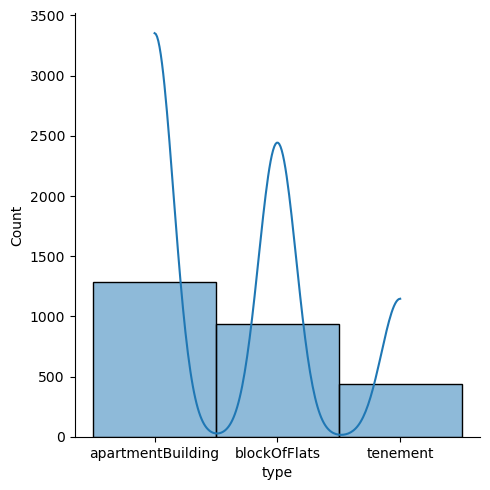

In [15]:
plt.figure(figsize=(2, 2))
sns.displot(data_rent["type"], kde=True)

In [16]:
data_rent["type"] = data_rent["type"].fillna(data_rent["type"].mode()[0])

In [17]:
data_rent["type"].info()

<class 'pandas.core.series.Series'>
Index: 3393 entries, 5242 to 8634
Series name: type
Non-Null Count  Dtype 
--------------  ----- 
3393 non-null   object
dtypes: object(1)
memory usage: 53.0+ KB


In [18]:
#sns.displot(data_pl["type"], kde=True)

<Figure size 600x600 with 0 Axes>

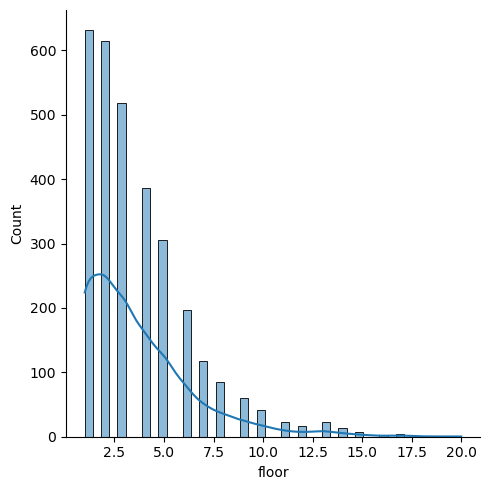

In [19]:
plt.figure(figsize=(6, 6))
sns.displot(data_rent["floor"], kde=True)

In [20]:
data_rent["floor"] = data_rent["floor"].fillna(data_rent["floor"].median())

<Figure size 600x600 with 0 Axes>

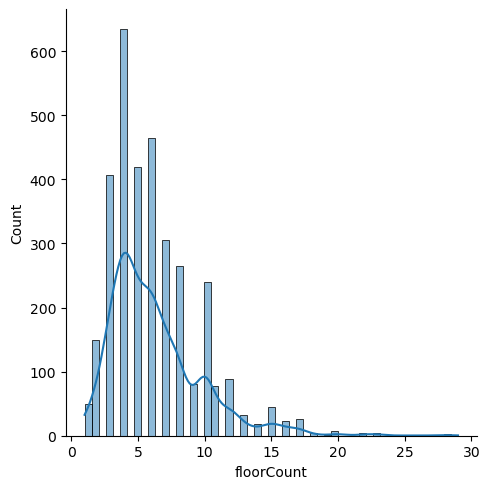

In [21]:
plt.figure(figsize=(6, 6))
sns.displot(data_rent["floorCount"], kde=True)

<Figure size 600x600 with 0 Axes>

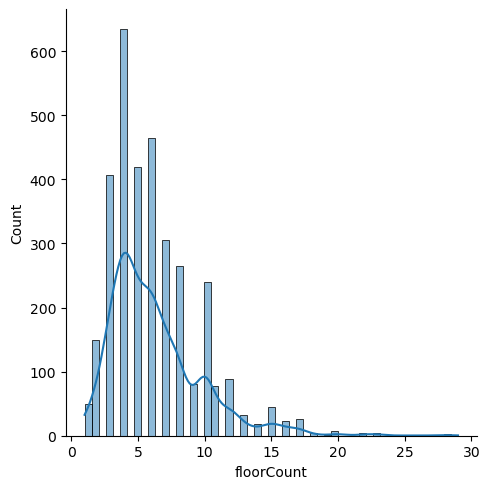

In [22]:
plt.figure(figsize=(6, 6))
sns.displot(data_rent["floorCount"], kde=True)

In [23]:
data_rent["floorCount"] = data_rent["floorCount"].fillna(data_rent["floorCount"].median())

<Figure size 600x600 with 0 Axes>

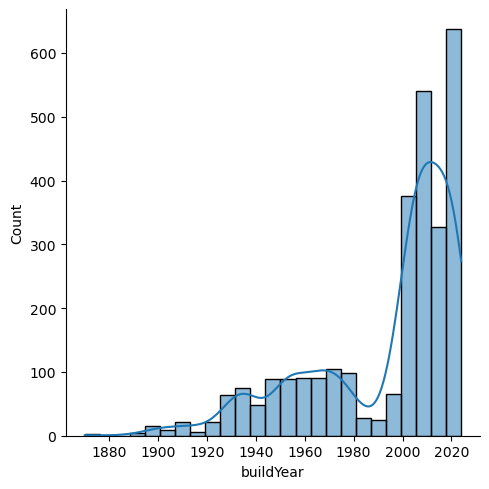

In [24]:
plt.figure(figsize=(6, 6))
sns.displot(data_rent["buildYear"], kde=True)

In [25]:
data_rent["buildYear"] = data_rent["buildYear"].fillna(data_rent["buildYear"].median())

<Figure size 400x400 with 0 Axes>

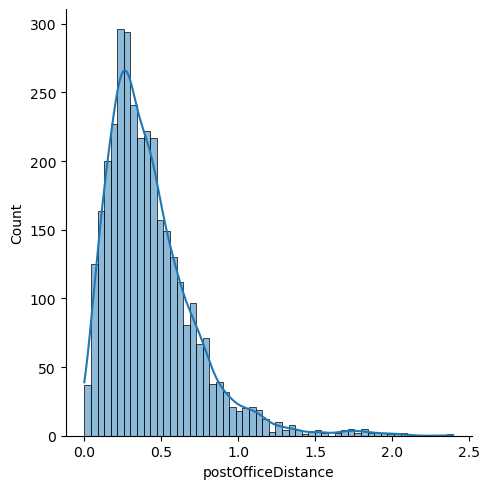

In [26]:
plt.figure(figsize=(4, 4))
sns.displot(data_rent["postOfficeDistance"], kde=True)

<Figure size 800x800 with 0 Axes>

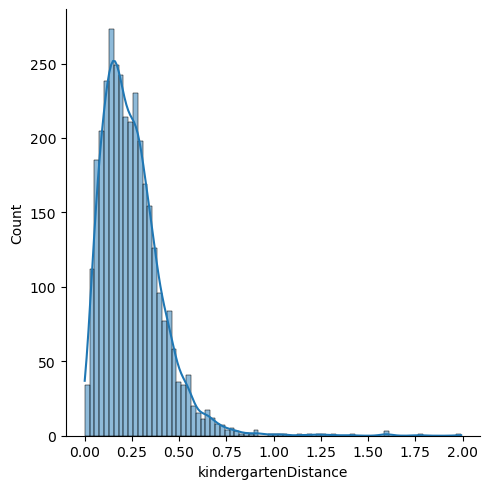

In [27]:
plt.figure(figsize=(8,8))
sns.displot(data_rent["kindergartenDistance"], kde=True)

<Figure size 400x400 with 0 Axes>

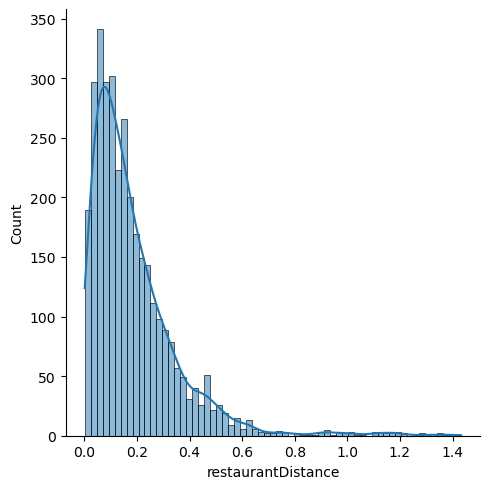

In [28]:
plt.figure(figsize=(4, 4))
sns.displot(data_rent["restaurantDistance"], kde=True)

<Figure size 400x400 with 0 Axes>

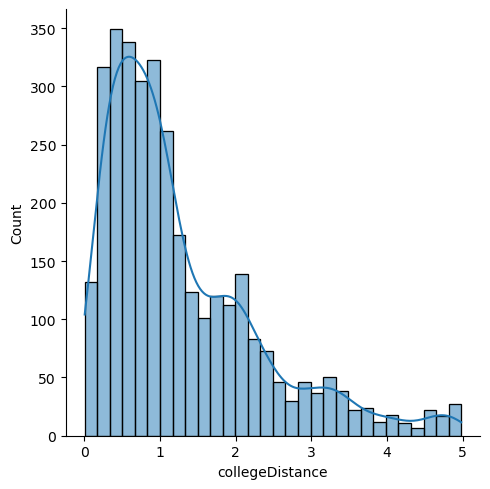

In [29]:
plt.figure(figsize=(4, 4))
sns.displot(data_rent["collegeDistance"], kde=True)

<Figure size 400x400 with 0 Axes>

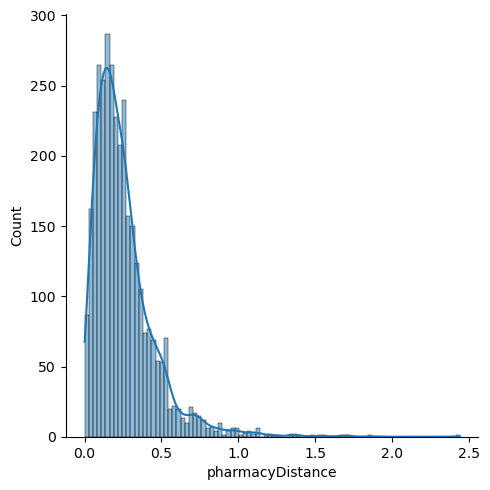

In [30]:
plt.figure(figsize=(4, 4))
sns.displot(data_rent["pharmacyDistance"], kde=True)

In [31]:
col_median= data_rent[["postOfficeDistance","kindergartenDistance", "restaurantDistance", "collegeDistance", "pharmacyDistance"]]
for col in col_median:
    data_rent[col] = data_rent[col].fillna(data_rent[col].median())

In [32]:
data_rent.isnull().sum()

city                      0
type                      0
squareMeters              0
rooms                     0
floor                     0
floorCount                0
buildYear                 0
centreDistance            0
poiCount                  0
schoolDistance            0
clinicDistance            0
postOfficeDistance        0
kindergartenDistance      0
restaurantDistance        0
collegeDistance           0
pharmacyDistance          0
hasParkingSpace           0
hasBalcony                0
hasElevator             126
hasSecurity               0
hasStorageRoom            0
price                     0
dtype: int64

In [33]:
count= data_rent["hasElevator"].isna().sum()
total_count=len(data_rent["hasElevator"])
percentage = (count/total_count)*100
percentage

3.7135278514588856

In [34]:
data_pl= data_rent.dropna(axis=0)

In [35]:
data_pl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3267 entries, 5242 to 8634
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  3267 non-null   object 
 1   type                  3267 non-null   object 
 2   squareMeters          3267 non-null   float64
 3   rooms                 3267 non-null   float64
 4   floor                 3267 non-null   float64
 5   floorCount            3267 non-null   float64
 6   buildYear             3267 non-null   float64
 7   centreDistance        3267 non-null   float64
 8   poiCount              3267 non-null   float64
 9   schoolDistance        3267 non-null   float64
 10  clinicDistance        3267 non-null   float64
 11  postOfficeDistance    3267 non-null   float64
 12  kindergartenDistance  3267 non-null   float64
 13  restaurantDistance    3267 non-null   float64
 14  collegeDistance       3267 non-null   float64
 15  pharmacyDistance      3

In [36]:
data_pl.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,poiCount,schoolDistance,...,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
5242,warszawa,apartmentBuilding,28.0,1.0,4.0,5.0,2020.0,1.63,46.0,0.188,...,0.057,0.056,0.341,0.333,yes,yes,yes,yes,yes,3000
5243,warszawa,apartmentBuilding,46.0,2.0,5.0,8.0,2017.0,11.29,29.0,0.252,...,0.358,0.194,0.826,0.226,yes,yes,yes,no,no,3200
5244,warszawa,apartmentBuilding,68.0,3.0,3.0,3.0,1904.0,3.15,41.0,0.084,...,0.014,0.097,0.554,0.071,no,no,no,no,no,4500
5245,warszawa,apartmentBuilding,74.0,3.0,1.0,6.0,2019.0,4.40,14.0,0.295,...,0.389,0.374,1.935,0.123,yes,no,yes,no,no,6500
5246,warszawa,apartmentBuilding,63.0,3.0,4.0,10.0,2012.0,3.50,27.0,0.164,...,0.246,0.188,0.429,0.216,yes,yes,yes,no,no,5500


In [37]:
data_pl["type"].unique()

array(['apartmentBuilding', 'blockOfFlats', 'tenement'], dtype=object)

In [38]:
data_pl['type'].replace('apartmentBuilding', 0, inplace = True)
data_pl['type'].replace('blockOfFlats', 1,  inplace = True)
data_pl['type'].replace('tenement', 2, inplace = True)

In [39]:
data_new=data_pl.drop(["city"], axis=1)

In [40]:
data_new

,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,poiCount,schoolDistance,clinicDistance,...,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
5242,0,28.0,1.0,4.0,5.0,2020.0,1.63,46.0,0.188,0.103,...,0.057,0.056,0.341,0.333,yes,yes,yes,yes,yes,3000
5243,0,46.0,2.0,5.0,8.0,2017.0,11.29,29.0,0.252,0.298,...,0.358,0.194,0.826,0.226,yes,yes,yes,no,no,3200
5244,0,68.0,3.0,3.0,3.0,1904.0,3.15,41.0,0.084,0.712,...,0.014,0.097,0.554,0.071,no,no,no,no,no,4500
5245,0,74.0,3.0,1.0,6.0,2019.0,4.40,14.0,0.295,0.371,...,0.389,0.374,1.935,0.123,yes,no,yes,no,no,6500
5246,0,63.0,3.0,4.0,10.0,2012.0,3.50,27.0,0.164,0.345,...,0.246,0.188,0.429,0.216,yes,yes,yes,no,no,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8630,0,73.0,3.0,3.0,3.0,2007.0,1.82,50.0,0.090,0.589,...,0.144,0.063,0.677,0.026,no,yes,yes,no,no,11900
8631,0,70.0,3.0,4.0,4.0,2005.0,3.04,19.0,0.281,0.066,...,0.265,0.010,0.274,0.162,yes,no,yes,no,no,8000
8632,0,64.0,2.0,2.0,5.0,2007.0,1.43,67.0,0.233,0.403,...,0.259,0.020,0.609,0.222,no,yes,yes,no,yes,8000
8633,2,108.0,5.0,4.0,4.0,1927.0,1.31,98.0,0.117,0.339,...,0.062,0.116,0.118,0.190,no,no,yes,no,no,11000


In [41]:
data_new["hasElevator"].unique()

array(['yes', 'no'], dtype=object)

In [42]:
encoder = LabelEncoder()

In [43]:
columns = ["hasParkingSpace","hasBalcony", "hasElevator", "hasSecurity", "hasStorageRoom"]

In [44]:
for column in columns:
    data_new[column] = encoder.fit_transform(data_new[column])

In [45]:
data_new

,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,poiCount,schoolDistance,clinicDistance,...,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
5242,0,28.0,1.0,4.0,5.0,2020.0,1.63,46.0,0.188,0.103,...,0.057,0.056,0.341,0.333,1,1,1,1,1,3000
5243,0,46.0,2.0,5.0,8.0,2017.0,11.29,29.0,0.252,0.298,...,0.358,0.194,0.826,0.226,1,1,1,0,0,3200
5244,0,68.0,3.0,3.0,3.0,1904.0,3.15,41.0,0.084,0.712,...,0.014,0.097,0.554,0.071,0,0,0,0,0,4500
5245,0,74.0,3.0,1.0,6.0,2019.0,4.40,14.0,0.295,0.371,...,0.389,0.374,1.935,0.123,1,0,1,0,0,6500
5246,0,63.0,3.0,4.0,10.0,2012.0,3.50,27.0,0.164,0.345,...,0.246,0.188,0.429,0.216,1,1,1,0,0,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8630,0,73.0,3.0,3.0,3.0,2007.0,1.82,50.0,0.090,0.589,...,0.144,0.063,0.677,0.026,0,1,1,0,0,11900
8631,0,70.0,3.0,4.0,4.0,2005.0,3.04,19.0,0.281,0.066,...,0.265,0.010,0.274,0.162,1,0,1,0,0,8000
8632,0,64.0,2.0,2.0,5.0,2007.0,1.43,67.0,0.233,0.403,...,0.259,0.020,0.609,0.222,0,1,1,0,1,8000
8633,2,108.0,5.0,4.0,4.0,1927.0,1.31,98.0,0.117,0.339,...,0.062,0.116,0.118,0.190,0,0,1,0,0,11000


<Axes: >

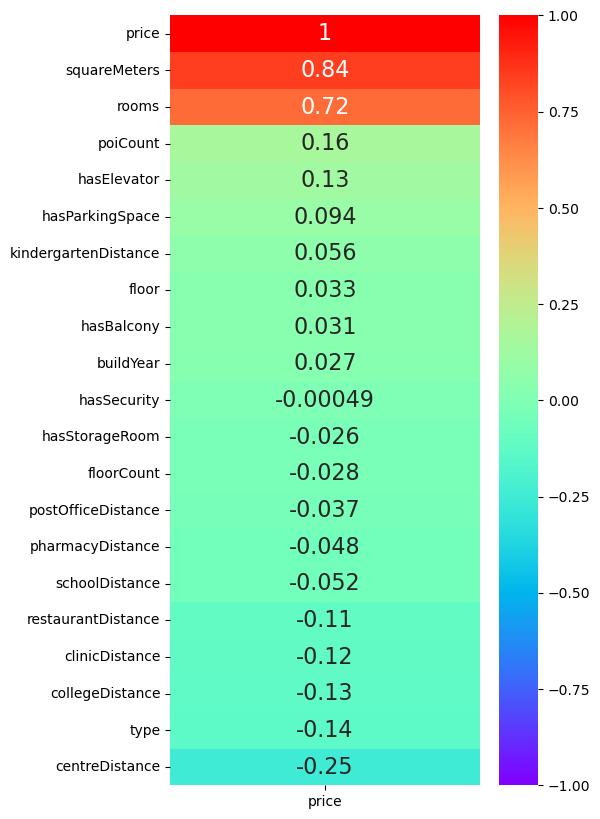

In [46]:
top_features = data_new.corr()[['price']].sort_values(by=['price'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [47]:
#def one_hot_encoding(df,col):
    #oneH = pd.get_dummies(df[col])
    #df = df.drop(col,axis = 1)
    #df = df.join(oneH)
    #return df

In [48]:
#columns = [Property type" ]
#for col in columns:
    #df_dublin = one_hot_encoding(df_dublin, col)

In [49]:
X = data_new.drop(columns=["price"])  # Replace 'target_column' with actual name
y = data_new['price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2613, 20)
x_test shape:  (654, 20)
y_train shape:  (2613,)
y_test shape:  (654,)


In [52]:
#scaler = MinMaxScaler()
#X_train= scaler.fit_transform(X_train)
#X_test= scaler.transform(X_test)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest ##

In [56]:
#create object from RandomForestRegressor
model = RandomForestRegressor()

In [57]:
# fit model
model.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
model.score(X_train, y_train)

0.975920598324816

In [59]:
predict = model.predict(X_test)

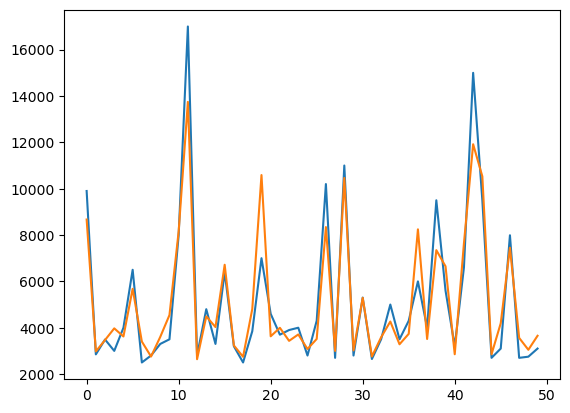

In [60]:
# Plot results
plt.plot(y_test.to_numpy()[:50])
plt.plot(predict[:50])
plt.show()

In [61]:
# see score
r2_score(predict, y_test)

0.7743695318851697

In [62]:
from sklearn.metrics import mean_squared_error 

rms = mean_squared_error(y_test, predict, squared=False)
print(rms)

1236.2333391088382


## LINEAR REGRESSION

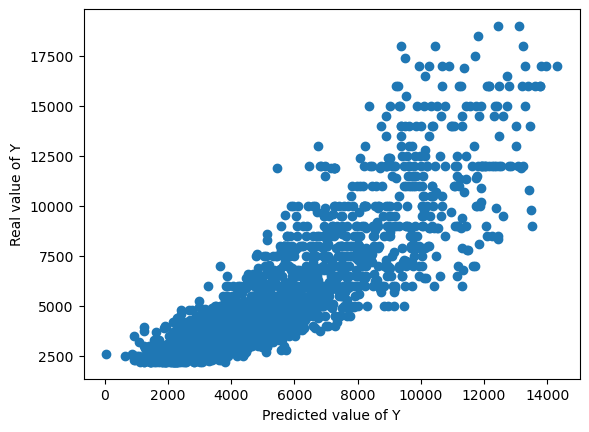

In [64]:
#build and train a linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
plt.scatter(lr.predict(X_train), y_train)
plt.xlabel('Predicted value of Y')
plt.ylabel('Real value of Y')
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
lr.score(X_train, y_train)

0.7502060010304941

In [67]:
# Predict
result = lr.predict(X_test)

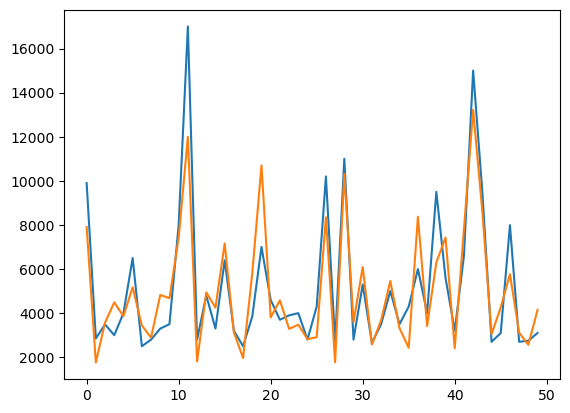

In [68]:
# Plot results
plt.plot(y_test.to_numpy()[:50])
plt.plot(result[:50])
plt.show()

In [69]:
# see score
r2_score(result, y_test)

0.6627765708010745

In [70]:
rms = mean_squared_error(y_test, result, squared=False)
print(rms)

1490.101389877999


## Decision Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
deTree = DecisionTreeRegressor()
deTree.fit(X_train, y_train)

DecisionTreeRegressor()

In [73]:
deTree.score(X_train, y_train)

0.9988733064408811

In [74]:
# Predict
dt_pred = deTree.predict(X_test)

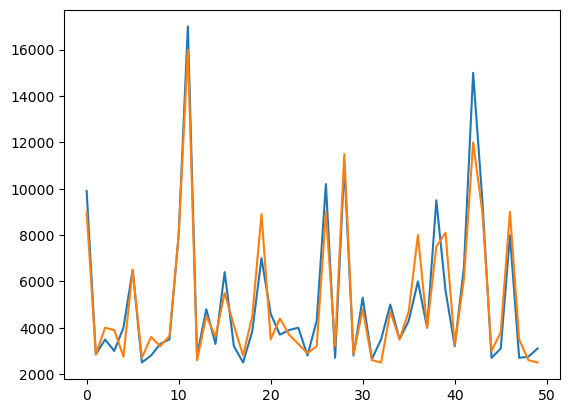

In [75]:
# Plot results
plt.plot(y_test.to_numpy()[:50])
plt.plot(dt_pred[:50])
plt.show()

In [76]:
# see score
r2_score(dt_pred, y_test)

0.6229038878334002

In [77]:
rms = mean_squared_error(y_test, dt_pred, squared=False)
print(rms)

1803.2817459920495
